In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
from src.utils import plot_missing_percentages, drop_missing_cols, custom_summary 
from src.dataloader import get_data_understanding, dpd_transform, R_CAT_VAR, R_CONT_VAR, CAT_VAR, CONT_VAR

In [3]:
import os
script_dir = os.path.dirname('')
results_dir = os.path.join(script_dir, 'output_data_understanding/')
os.makedirs(results_dir, exist_ok=True)

### Load Data

We filter out patients with age set to zero.

In [4]:
df = get_data_understanding(dataset='./data/data_v2.xlsx', sheet_name='Data')
df = df[df.DMAGE > 0]

df = pd.read_excel('raw_data.xlsx', sheet_name='Data', skiprows=1) # Skip first row
df.columns = [col.replace('1.', '') for col in df.columns] # Remove 1. from col names

### Analyse DPD Features

In [5]:
dpd = df[['DUSCYN','DUSC', 'DUSCGR']]
pd.set_option('display.max_rows', None)
dpd['DUSCYN'] = dpd['DUSCYN'].fillna('Ukjent')

/var/folders/vs/j6yb25ns4dqdm1ydd9mjyzgw0000gn/T/ipykernel_472/1787453763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpd['DUSCYN'] = dpd['DUSCYN'].fillna('Ukjent')


In [6]:
dpd[10:].head(10)

,DUSCYN,DUSC,DUSCGR
11,Ja,Patologisk,3.00
12,Ja,Patologisk,1.00
13,Nei,NaN,NaN
14,Ja,Normal,NaN
15,Ja,Normal,NaN
16,Nei,NaN,NaN
17,Ja,Normal,NaN
18,Ja,Patologisk,2.00
19,Ja,Patologisk,3.00
20,Ja,Normal,NaN


In [7]:
dpd_transform(dpd[10:]).head(10)

/Users/jmriiser/Dev/master_thesis/data_mining_prac/src/dataloader.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.at[i, ['DPD']] = str(row['DUSCGR']) if str(


,DPD
11,3.0
12,1.0
13,Ikke testet
14,Normal
15,Normal
16,Ikke testet
17,Normal
18,2.0
19,3.0
20,Normal


In [8]:
important = ['SubjectId',
             'DMAGE', 'DMSEX', 'PHRVSPYN', 'PHDIAG', 'PHMH2CD',
             'PHMH6CD', 'PHMH7CD', 'PHMH8CD', 'PHMH9CD', 'PHMH10CD',
             'EKGVOLT', 'ECHLVIDD', 'ECHLVIDS', 'ECHIVSD', 'ECHLVPW',
             'ECHLADIA', 'ECHLAAR', 'ECHLAVOL', 'ECHEJFR', 'ECHEA',
             'ECHESEPT', 'ECHELAT', 'ECHEAVG',
             'HEKRRE', 'HEGFRRE', 'HEBNPRE', 'HETNTRE', 'HEKAPRE', 'HELAMRE',
             'DUOTHBIYN', 'DUSCGRCD'
            ]

categorical = [
    'DMSEX', 'PHRVSPYN', 'PHDIAGCD', 
    'PHMH2CD', 'PHMH6CD', 'PHMH7CD', 'PHMH8CD', 'PHMH9CD', 'PHMH10CD',
    'EKGVOLT', 'DUOTHBIYN', 'DUSCGRCD'
]

continuous = [
    'DMAGE', 
    'ECHLVIDD', 'ECHLVIDS', 'ECHIVSD', 'ECHLVPW',
    'ECHLADIA', 'ECHLAAR', 'ECHLAVOL', 'ECHEJFR', 'ECHEA',
    'ECHESEPT', 'ECHELAT', 'ECHEAVG',
    'HEKRRE', 'HEGFRRE', 'HEBNPRE', 'HETNTRE', 'HEKAPRE', 'HELAMRE'
]

In [9]:
selected_df = df.drop(columns=[col for col in df if col not in important])

In [10]:
custom_summary(selected_df)

,percent_missing,total_missing:,num_unique_vals:,d_type:
SubjectId,0.00,0,172,object
DMAGE,0.00,0,50,int64
DMSEX,0.00,0,2,object
PHDIAG,0.00,0,3,object
EKGVOLT,4.65,8,2,object
ECHLVIDD,16.86,29,34,float64
ECHLVIDS,56.98,98,31,float64
ECHIVSD,13.95,24,20,float64
ECHLVPW,27.33,47,17,float64
ECHLADIA,59.88,103,25,float64


### Check for missing values
Visualize the features in terms of their percentage of missing data. The red line presents the 40% threshold. All features that are visible on the right side of the red line will be filtered out, the rest is kept.

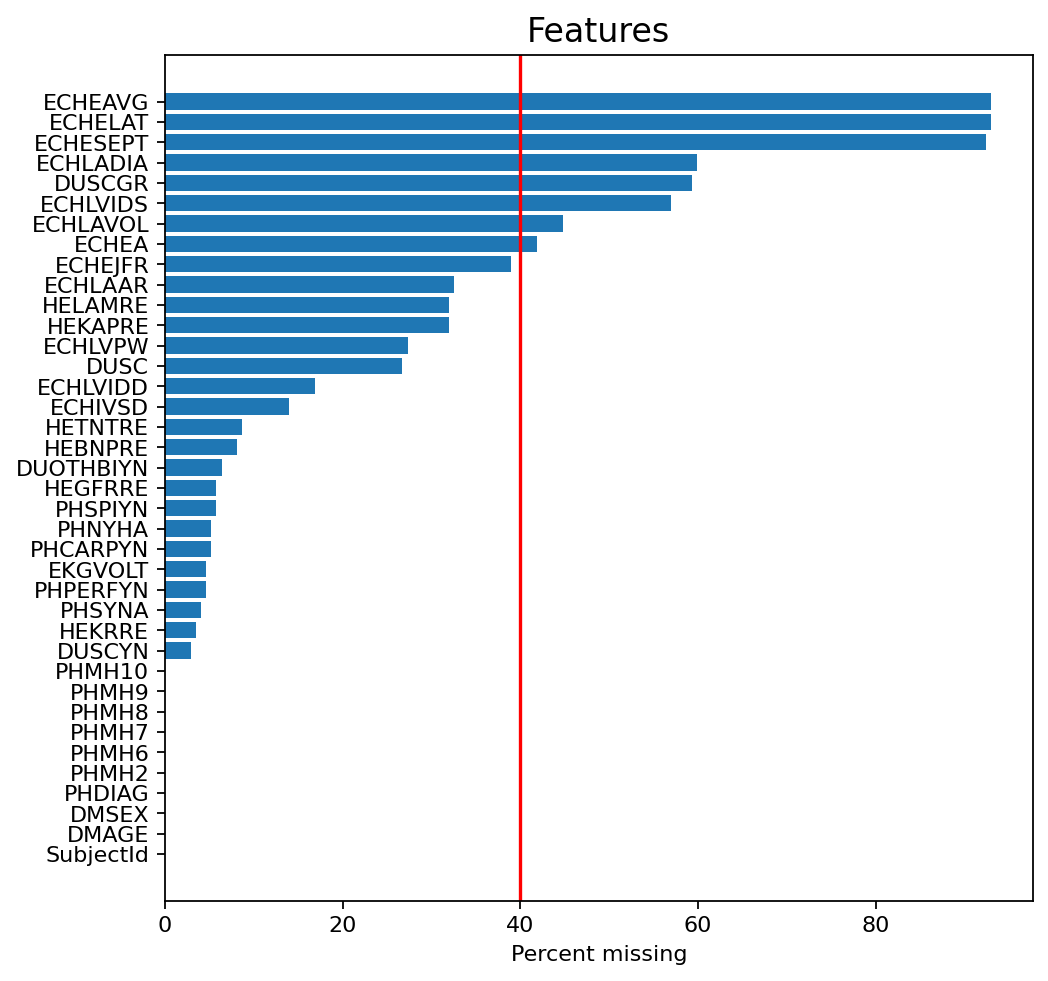

In [11]:
plot_missing_percentages(df, 40, os.path.join(results_dir, 'missing'))

In [12]:
drop_missing_cols(df,40).columns

Index(['SubjectId', 'DMAGE', 'DMSEX', 'PHDIAG', 'PHMH2', 'PHMH6', 'PHMH7',
       'PHMH8', 'PHMH9', 'PHMH10', 'PHNYHA', 'PHSYNA', 'PHCARPYN', 'PHSPIYN',
       'PHPERFYN', 'EKGVOLT', 'ECHLVIDD', 'ECHIVSD', 'ECHLVPW', 'ECHLAAR',
       'ECHEJFR', 'HEKRRE', 'HEGFRRE', 'HEBNPRE', 'HETNTRE', 'HEKAPRE',
       'HELAMRE', 'DUOTHBIYN', 'DUSCYN', 'DUSC'],
      dtype='object')

### Continuous features

Summary of the continuous features is presented in the cell below.

In [13]:
df[R_CONT_VAR].describe().T

,count,mean,std,min,25%,50%,75%,max
DMAGE,172.00,70.38,12.70,32.00,65.00,73.00,78.25,91.00
ECHLVIDD,143.00,5.17,3.77,3.00,4.30,4.70,5.30,49.00
ECHLVIDS,74.00,4.11,3.75,1.70,3.00,3.55,4.30,35.00
ECHIVSD,148.00,1.49,0.40,0.50,1.20,1.50,1.80,2.80
ECHLVPW,125.00,1.16,0.34,0.40,0.90,1.10,1.40,2.10
ECHLADIA,69.00,4.57,0.70,2.80,4.00,4.60,5.00,5.90
ECHLAAR,116.00,27.55,6.72,13.00,23.00,27.00,31.00,54.00
ECHLAVOL,95.00,47.95,18.26,20.00,38.00,46.00,55.50,132.00
ECHEJFR,105.00,46.24,11.76,20.00,40.00,50.00,55.00,69.00
ECHEA,100.00,1.75,1.19,0.10,0.90,1.20,2.55,5.50


The median values for each of the continuous features grouped by the diagnoses is presented below.

In [14]:
df[R_CONT_VAR+['PHDIAG']].groupby('PHDIAG').median().T

PHDIAG,AL amyloidose,Annet,TTR amyloidose
DMAGE,67.00,66.00,77.00
ECHLVIDD,4.80,5.05,4.70
ECHLVIDS,3.50,3.55,3.60
ECHIVSD,1.30,1.30,1.50
ECHLVPW,1.10,1.00,1.35
ECHLADIA,4.45,4.20,4.70
ECHLAAR,26.00,25.00,28.00
ECHLAVOL,47.50,46.00,45.00
ECHEJFR,50.00,55.00,45.00
ECHEA,2.00,1.00,1.30


The distribution of values presented below.

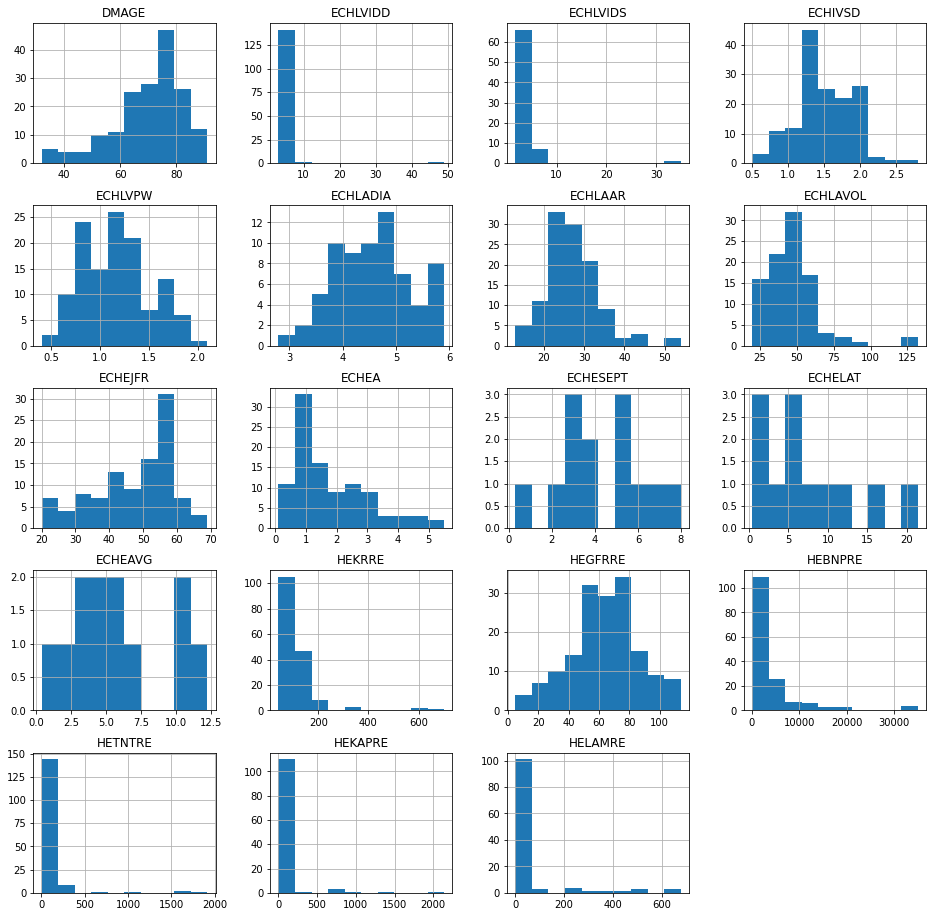

In [15]:
df[R_CONT_VAR].hist(figsize=(16,16))

plt.savefig(os.path.join(results_dir, 'cont_feature_distribution'))

In [16]:
len(df[R_CONT_VAR].columns)

19

### Categorical features

Summary of the categorical features is presented below. For most of the features, there is only two unique values. We have interpreted this as one value meaning unknown, and the other is the positive value.

In [17]:
df[R_CAT_VAR].describe(include='object').T

,count,unique,top,freq
PHNYHA,163,5,II,64
PHSYNA,165,2,Nei,146
PHCARPYN,163,2,Nei,136
PHSPIYN,162,2,Nei,147
DMSEX,172,2,Mann,130
PHDIAG,172,3,TTR amyloidose,91
PHMH2,172,2,Ukjent,90
PHMH6,172,2,Ukjent,124
PHMH7,172,2,Ukjent,108
PHMH8,172,2,Ukjent,158


The value distribution for each categorical feature is presented below. For many features, the predominant value is "ukjent" (i.e., unknown). These cases usually indicate that the features will have low variance.

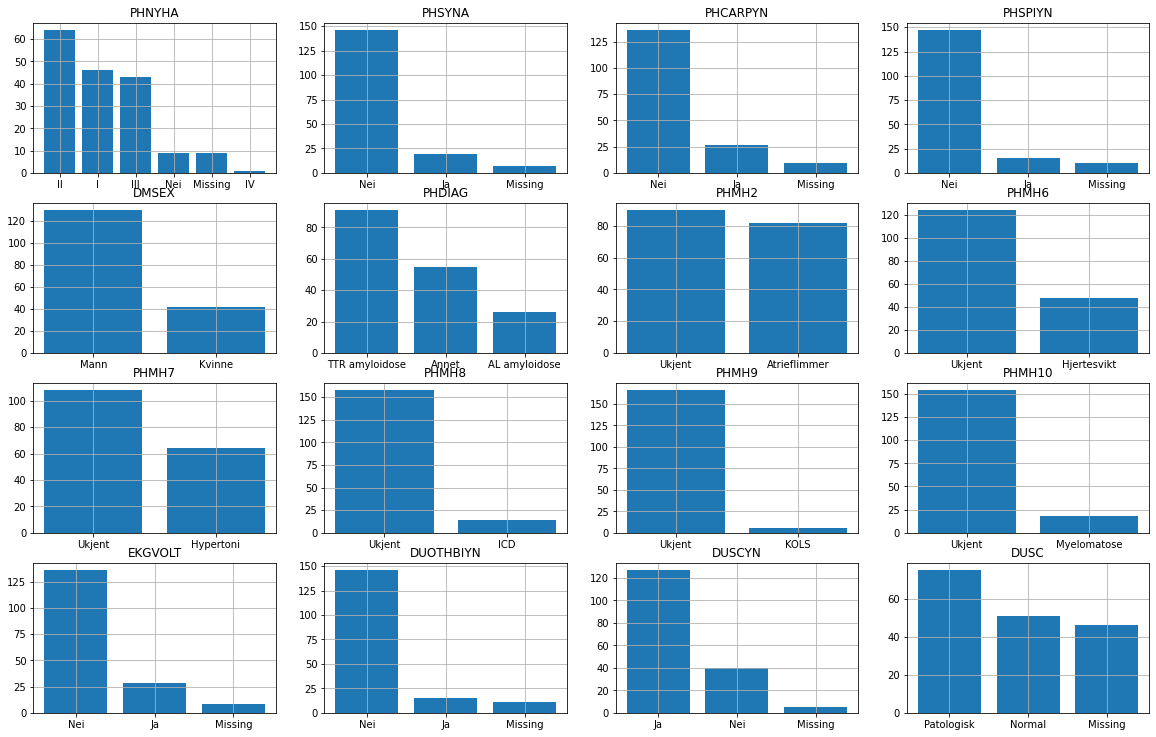

In [18]:

fig, axs = plt.subplots(5, 4, figsize=(20, 16))
axs=axs.flatten()
for i, col in enumerate(df[R_CAT_VAR].columns):
    vals = df[col].value_counts(dropna=False).rename({np.nan: 'Missing'})
    axs[i].grid(True, linestyle = "-")
    axs[i].bar(vals.keys(), vals)
    axs[i].set_title(df[R_CAT_VAR].columns[i])
#fig.text(0.5, 0.04, 'Values', ha='center', fontsize=12)
#fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical', fontsize=12)
fig.delaxes(axs[-1])
fig.delaxes(axs[-2])
fig.delaxes(axs[-3])
fig.delaxes(axs[-4])

plt.savefig(os.path.join(results_dir, 'cat_feature_distribution'))

In [19]:
df[R_CAT_VAR].groupby('PHDIAG').describe(include='object').T

PHDIAG           AL amyloidose   Annet TTR amyloidose
PHNYHA    count             25      55             83
          unique             4       5              4
          top               II       I             II
          freq              11      21             40
PHSYNA    count             26      55             84
          unique             2       2              2
          top              Nei     Nei            Nei
          freq              23      45             78
PHCARPYN  count             26      53             84
          unique             2       2              2
          top              Nei     Nei            Nei
          freq              25      50             61
PHSPIYN   count             26      53             83
          unique             1       2              2
          top              Nei     Nei            Nei
          freq              26      52             69
DMSEX     count             26      55             91
          unique             2       2              2
          top             Mann    Mann           Mann
          freq              19      35             76
PHMH2     count             26      55             91
          unique             2       2              2
          top           Ukjent  Ukjent   Atrieflimmer
          freq              23      33             57
PHMH6     count             26      55             91
          unique             2       2              2
          top           Ukjent  Ukjent         Ukjent
          freq              19      40             65
PHMH7     count             26      55             91
          unique             2       2              2
          top           Ukjent  Ukjent         Ukjent
          freq              19      30             59
PHMH8     count             26      55             91
          unique             1       2              2
          top           Ukjent  Ukjent         Ukjent
          freq              26      45             87
PHMH9     count             26      55             91
          unique             2       2              2
          top           Ukjent  Ukjent         Ukjent
          freq              25      53             88
PHMH10    count             26      55             91
          unique             2       2              2
          top           Ukjent  Ukjent         Ukjent
          freq              16      50             88
EKGVOLT   count             25      55             84
          unique             2       2              2
          top              Nei     Nei            Nei
          freq              17      54             65
DUOTHBIYN count             26      54             81
          unique             2       1              2
          top              Nei     Nei            Nei
          freq              17      54             75
DUSCYN    count             25      55             87
          unique             2       2              2
          top              Nei      Ja             Ja
          freq              13      44             71
DUSC      count             12      44             70
          unique             2       2              1
          top           Normal  Normal     Patologisk
          freq              10      41             70

In [20]:
len(df[R_CAT_VAR].columns)

17